In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("/home1/smaruj/akitaX1-analyses/figures/plot_styles/global_plotting_style.mplstyle")
from scipy import stats

from helper import (summarize_dot_anchors_data, summarize_average_models_dot_boundary)

### Reading dot vs. boundary data for dot-associated CTCF sites

In [2]:
data_dir = "/project/fudenber_735/akitaX1_analyses_data/virtual_insertion_dots_vs_boundaries/dot_anchors_windows"
df = summarize_dot_anchors_data(data_dir)

- processing boundary data from model 0
- processing boundary data from model 1
- processing boundary data from model 2
- processing boundary data from model 3
- processing dot data from model 0
- processing dot data from model 1
- processing dot data from model 2
- processing dot data from model 3


### Correlation between boundary score and FDR

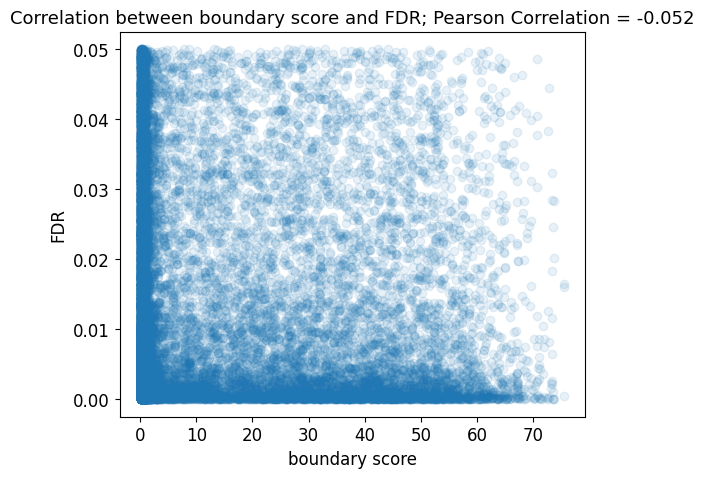

In [3]:
fig, ax = plt.subplots(figsize=(6, 5))

scatter = ax.scatter(df["SCD_B"], df["FDR"], alpha=0.1)

pearson_corr = stats.pearsonr(df["SCD_B"], df["FDR"]).statistic
rounded_pearson_corr = round(pearson_corr, 3)

ax.set_xlabel("boundary score")
ax.set_ylabel("FDR")

ax.set_title(f"Correlation between boundary score and FDR; Pearson Correlation = {rounded_pearson_corr}")

plt.show()

### Correlation between boundary and dot maps' insertion scores

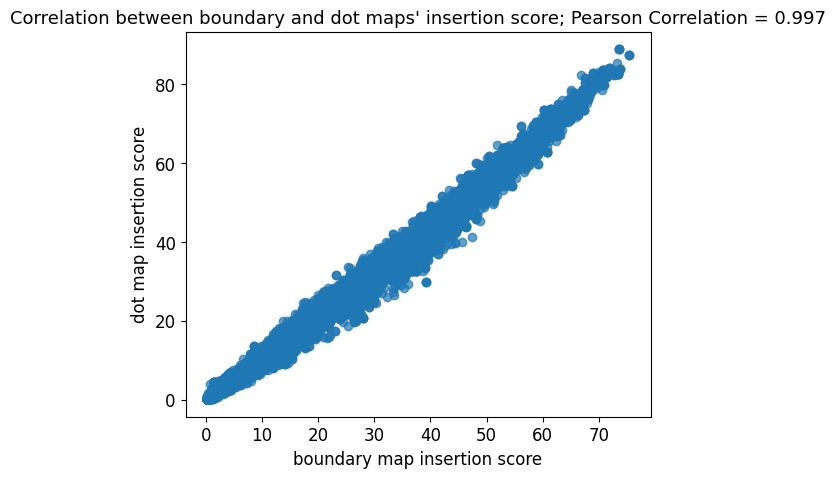

In [7]:
fig, ax = plt.subplots(figsize=(6, 5))

scatter = ax.scatter(df["SCD_B"], df["SCD_D"], alpha=0.7)

pearson_corr = stats.pearsonr(df["SCD_B"], df["SCD_D"]).statistic
rounded_pearson_corr = round(pearson_corr, 3)

ax.set_xlabel("boundary map insertion score")
ax.set_ylabel("dot map insertion score")

ax.set_title(f"Correlation between boundary and dot maps' insertion score; Pearson Correlation = {rounded_pearson_corr}")

plt.show()

### Boundarys score vs. cross-score

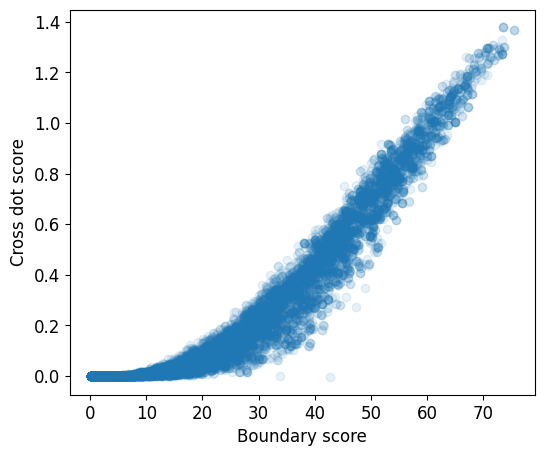

In [6]:
fig, ax = plt.subplots(figsize=(6, 5))

scatter = ax.scatter(df["SCD_B"], df["cross-score_D"], alpha=0.1)

ax.set_xlabel("Boundary score")
ax.set_ylabel("Cross dot score")

plt.show()

### Boundary score vs. dot-score

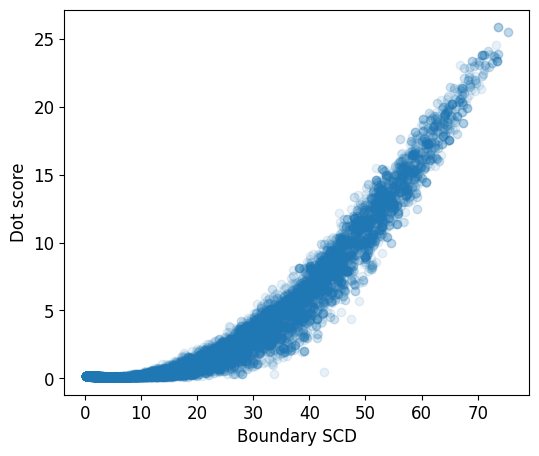

In [8]:
fig, ax = plt.subplots(figsize=(6, 5))

scatter = ax.scatter(df["SCD_B"], df["dot-score_D"], alpha=0.1)

ax.set_xlabel("Boundary SCD")
ax.set_ylabel("Dot score")

plt.show()

### Boundary score vs. x-score

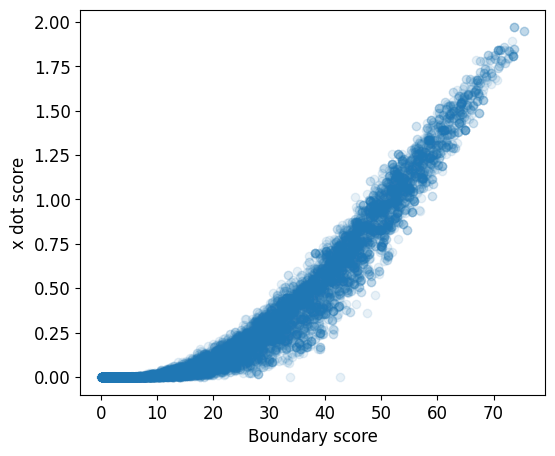

In [9]:
fig, ax = plt.subplots(figsize=(6, 5))

scatter = ax.scatter(df["SCD_B"], df["x-score_D"], alpha=0.1)

ax.set_xlabel("Boundary score")
ax.set_ylabel("x dot score")

plt.show()

### Scatterplot with histograms on the margins

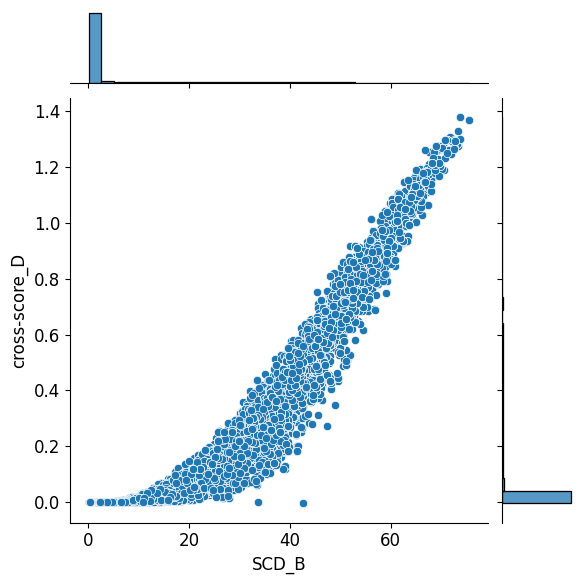

In [12]:
sns.jointplot(
    x=df["SCD_B"], y=df["cross-score_D"], marginal_kws=dict(bins=30, fill=True),
)

### Overlapping scatterplots between boundary and dot windows

In [13]:
# reading dot vs. boundary exp. data for boundary-associated CTCF sites
boundary_data_dir = "/project/fudenber_735/akitaX1_analyses_data/virtual_insertion_dots_vs_boundaries/boundary_windows"
B_df = summarize_average_models_dot_boundary(boundary_data_dir, 8, ignore_keys=["insertion_SCD", "disruption_SCD"])

Working on MODEL 0
- Processing boundary scores
- Processing dot scores
Working on MODEL 1
- Processing boundary scores
- Processing dot scores
Working on MODEL 2
- Processing boundary scores
- Processing dot scores
Working on MODEL 3
- Processing boundary scores
- Processing dot scores
Working on MODEL 4
- Processing boundary scores
- Processing dot scores
Working on MODEL 5
- Processing boundary scores
- Processing dot scores
Working on MODEL 6
- Processing boundary scores
- Processing dot scores
Working on MODEL 7
- Processing boundary scores
- Processing dot scores


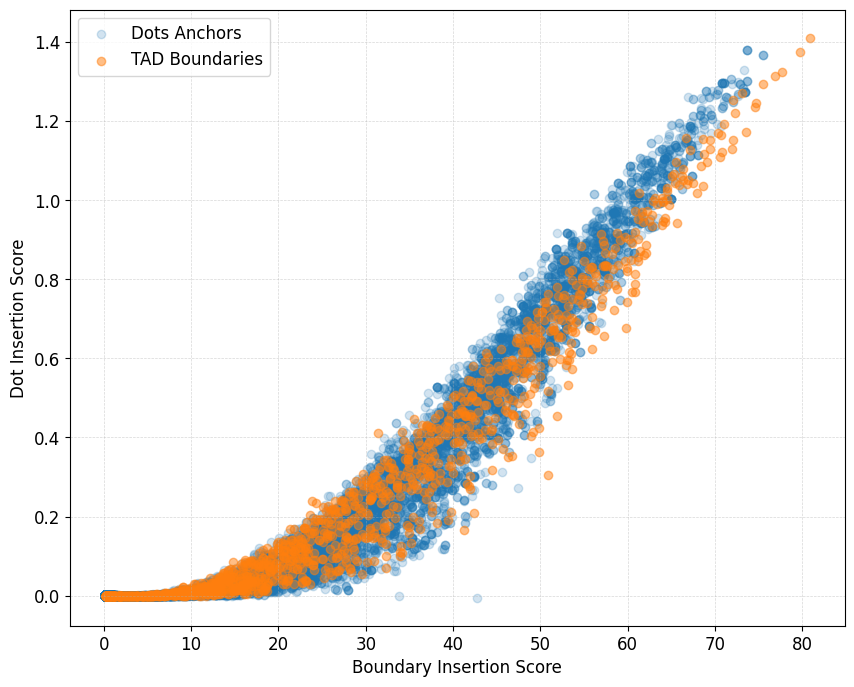

In [14]:
fig, ax = plt.subplots(figsize=(10, 8))

scatter = ax.scatter(df["SCD_B"], df["cross-score_D"], alpha=0.2, label="Dots Anchors")
scatter = ax.scatter(B_df["SCD_B"], B_df["cross-score"], alpha=0.5, label="TAD Boundaries")

ax.legend()
ax.set_xlabel("Boundary Insertion Score")
ax.set_ylabel("Dot Insertion Score")

plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.5)

# plt.savefig("./plots/TADs_dot_anchors_scatter.pdf", format="pdf", bbox_inches="tight")

plt.show()